In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn import preprocessing
import warnings
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import math
import numpy
import random
import scipy.special as special
import tqdm
import gc
import pickle
import xgboost as xgb

In [2]:
def feat_select(train, test):
  
    features = train.drop(['is_trade', 'time', 'context_timestamp','user_id','context_id','instance_id','item_id','shop_id','item_brand_id'], axis=1).columns.tolist() #,'item_property_list','predict_category_property'

    target = ['is_trade']

    return features, target

In [3]:
path = '../data/'
data = pd.read_csv(path+"all_final_data_11-28-12-33.csv")
train = pd.read_csv(path+"train_all.csv")
train = train[['instance_id']]
train =pd.merge(train, data, how='left', on='instance_id')

test = pd.read_csv(path+"test_all.csv")
test = test[['instance_id']]
test = pd.merge(test, data, how='left', on='instance_id')

In [4]:
from xgboost import plot_importance

def xgbCV(train, test):
    
    features, target = feat_select(train, test)
    
    X = train[features]
    y = train[target]
    X_tes = test[features]
    y_tes = test[target]

    print('Training XGB model...')
    X_train_set = xgb.DMatrix(X, label=y, missing=np.nan)
    X_validate_set = xgb.DMatrix(X_tes, label=y_tes, missing=np.nan)
    watchlist = [(X_train_set, 'train'), (X_validate_set, 'eval')]
    params = {'max_depth':7,
              'nthread': 25,
              'eta': 0.01,
            #   'eval_metric': 'logloss',
              'objective': 'binary:logistic',
              'subsample': 0.85,
              'colsample_bytree': 0.85,
              'silent': 1,
              'seed': 0,
              'min_child_weight': 6
              #'scale_pos_weight':0.5
              }
    gbm = xgb.train(params, X_train_set, evals=watchlist, early_stopping_rounds=50) #, num_boost_round=3000
    plot_importance(gbm)

    best_iter_num = gbm.best_iteration
    return best_iter_num,gbm


Training XGB model...
[0]	train-logloss:0.16038	eval-logloss:0.15902
[1]	train-logloss:0.15925	eval-logloss:0.15790
[2]	train-logloss:0.15812	eval-logloss:0.15678


c:\users\hp\downloads\python39\lib\site-packages\xgboost\core.py:160: UserWarning: [14:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	train-logloss:0.15700	eval-logloss:0.15568
[4]	train-logloss:0.15590	eval-logloss:0.15459
[5]	train-logloss:0.15481	eval-logloss:0.15352
[6]	train-logloss:0.15374	eval-logloss:0.15246
[7]	train-logloss:0.15267	eval-logloss:0.15141
[8]	train-logloss:0.15161	eval-logloss:0.15037
[9]	train-logloss:0.15057	eval-logloss:0.14934


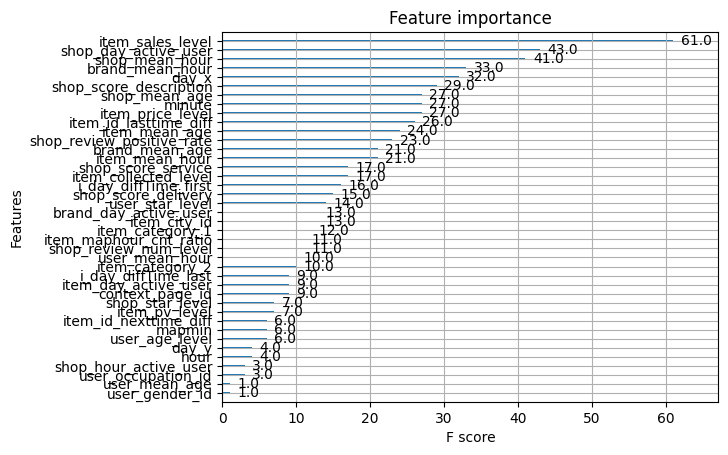

In [5]:
best_iter,gbm = xgbCV(train, test)

In [9]:
best_iter

788

In [23]:
type(gbm)

xgboost.core.Booster

In [35]:
import operator
importance = gbm.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
pd.DataFrame(importance).to_csv('xgb_feat_imp.csv',index=False)

In [10]:
features, target = feat_select(train, test)
    
X_train = train[features]
y_train = train[target]
X_tes = test[features]
y_tes = test[target]
X_validate_set = xgb.DMatrix(X_tes, label=y_tes, missing=np.nan)

ypred=gbm.predict(X_validate_set)

19817

In [14]:
from sklearn.metrics import confusion_matrix

for i in range(len(ypred)): 
    if ypred[i]>=.5: 
       ypred[i]=1 
    else: 
       ypred[i]=0 
print("混淆矩阵:")
print(confusion_matrix(y_tes, ypred))

混淆矩阵:
[[19549     0]
 [  268     0]]


In [9]:
# params = {'max_depth':7,
#               'nthread': 25,
#               'eta': 0.01,
#             #   'eval_metric': 'logloss',
#               'objective': 'binary:logistic',
#               'subsample': 0.85,
#               'colsample_bytree': 0.85,
#               'silent': 1,
#               'seed': 0,
#               'min_child_weight': 6
#               #'scale_pos_weight':0.5
#               }
model = xgb.XGBClassifier('max_depth':7,'nthread': 25,'eta': 0.01)
model.fit(X_train, y_train)

SyntaxError: invalid syntax (281351503.py, line 13)